## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.85

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0804 14:28:25.196731 10200 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0804 14:28:25.197729 10200 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0804 14:28:25.215681 10200 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 14:28:25.216715 10200 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 14:28:25.218674 10200 deprecation_

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0804 14:28:25.433712 10200 deprecation.py:323] From D:\Software\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.9826 - acc: 0.2703 - val_loss: 1.9389 - val_acc: 0.2874
Epoch 2/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7576 - acc: 0.3657 - val_loss: 1.6768 - val_acc: 0.4016
Epoch 3/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6938 - acc: 0.3884 - val_loss: 1.6201 - val_acc: 0.4174
Epoch 4/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6405 - acc: 0.4120 - val_loss: 1.6897 - val_acc: 0.4067
Epoch 5/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.5780 - acc: 0.4338 - val_loss: 1.6494 - val_acc: 0.4122
Epoch 6/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.5486 - acc: 0.4433 - val_loss: 1.5720 - val_acc: 0.4284
Epoch 7/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.5161 - acc: 0.4566 - val_loss: 1.5842 - val_ac

50000/50000 [==============================] - 3s 67us/step - loss: 1.7032 - acc: 0.3934 - val_loss: 1.6837 - val_acc: 0.3892
Epoch 3/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.6128 - acc: 0.4297 - val_loss: 1.6108 - val_acc: 0.4227
Epoch 4/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.5549 - acc: 0.4482 - val_loss: 1.5321 - val_acc: 0.4590
Epoch 5/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.5090 - acc: 0.4636 - val_loss: 1.5099 - val_acc: 0.4625
Epoch 6/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4656 - acc: 0.4785 - val_loss: 1.5168 - val_acc: 0.4577
Epoch 7/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4325 - acc: 0.4923 - val_loss: 1.4451 - val_acc: 0.4864
Epoch 8/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4040 - acc: 0.5010 - val_loss: 1.4743 - val_acc: 0.4720
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8396 - acc: 0.3547 - val_loss: 1.8253 - val_acc: 0.3651
Epoch 5/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8050 - acc: 0.3684 - val_loss: 1.7957 - val_acc: 0.3677
Epoch 6/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.7742 - acc: 0.3793 - val_loss: 1.7590 - val_acc: 0.3885
Epoch 7/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.7484 - acc: 0.3883 - val_loss: 1.7417 - val_acc: 0.3953
Epoch 8/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.7247 - acc: 0.3975 - val_loss: 1.7139 - val_acc: 0.4015
Epoch 9/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.7033 - acc: 0.4047 - val_loss: 1.6923 - val_acc: 0.4069
Epoch 10/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.6835 - acc: 0.4122 - val_loss: 1.6773 - val_acc: 0.4110
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 4s 71us/step - loss: 2.0790 - acc: 0.2780 - val_loss: 2.0619 - val_acc: 0.2826
Epoch 6/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.0492 - acc: 0.2862 - val_loss: 2.0339 - val_acc: 0.2950
Epoch 7/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.0232 - acc: 0.2958 - val_loss: 2.0099 - val_acc: 0.3038
Epoch 8/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.0007 - acc: 0.3009 - val_loss: 1.9885 - val_acc: 0.3120
Epoch 9/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.9806 - acc: 0.3081 - val_loss: 1.9697 - val_acc: 0.3174
Epoch 10/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.9626 - acc: 0.3130 - val_loss: 1.9533 - val_acc: 0.3243
Epoch 11/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9467 - acc: 0.3188 - val_loss: 1.9382 - val_acc: 0.3294
Epoch 12/50
50000/50000 [=========================

Epoch 7/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.2654 - acc: 0.1516 - val_loss: 2.2640 - val_acc: 0.1532
Epoch 8/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.2596 - acc: 0.1540 - val_loss: 2.2584 - val_acc: 0.1540
Epoch 9/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.2541 - acc: 0.1566 - val_loss: 2.2530 - val_acc: 0.1563
Epoch 10/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.2488 - acc: 0.1597 - val_loss: 2.2479 - val_acc: 0.1585
Epoch 11/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.2437 - acc: 0.1623 - val_loss: 2.2429 - val_acc: 0.1620
Epoch 12/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.2387 - acc: 0.1655 - val_loss: 2.2381 - val_acc: 0.1654
Epoch 13/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.2339 - acc: 0.1698 - val_loss: 2.2333 - val_acc: 0.1692
Epoch 14/50
50000/50000 [============

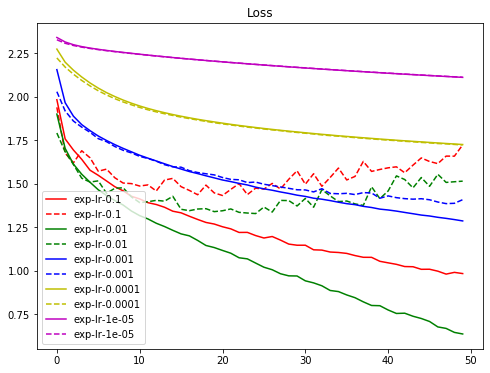

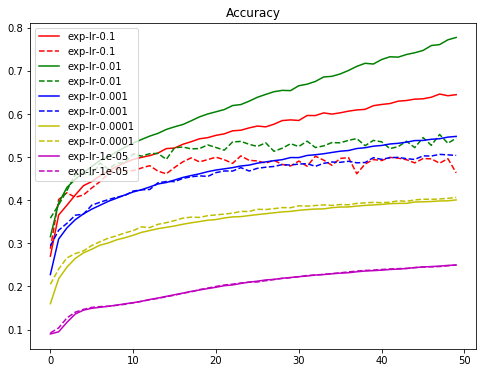

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()